# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
! pip install pandas

In [7]:
#LOAD THE DATA
import pandas as pd
data = pd.read_csv('water_potability.csv')
print (data.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [8]:
# Filling in the missing rows
data.fillna(data.mean(), inplace=True)

# Chack for missing data
print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Plot the Data Appropriately

In [9]:

# generate 2d classification dataset
X = data.drop(columns=['Potability'], axis=1)
y = data['Potability']

In [ ]:
! pip install scikit-learn

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print('Training set size: ', X_train.shape)
print('Testing set size: ', X_test.shape)

Training set size:  (1965, 9)
Testing set size:  (656, 9)


# Each Memeber Defines their model Here

In [13]:
! pip install tensorflow

  Using cached tensorflow-2.18.0-cp39-cp39-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp39-cp39-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp39-cp39-win_amd64.whl.metadata (6.5 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached h5py-3.12.1-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.4.1-

In [44]:
#Model Definition by member 1
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def model_by_Eliane():

  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001))),
  model.add(Dropout(0.5))

  model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001))),
  model.add(Dropout(0.5))

  model.add(Dense(1, activation='sigmoid'))

  optimizer = Adam(learning_rate=0.001)
  model.compile(
      optimizer = optimizer,
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
  )

  return model

# Start the training Process

In [16]:
! pip install matplotlib

  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 3.0 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/7.8 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 3.9 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.8 MB 3.1 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.8 MB 3.1 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.8 MB 1.9 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/7.8 MB 1.8 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/

c:\Users\user\water_quality_model\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4836 - loss: 0.7989 - val_accuracy: 0.6458 - val_loss: 0.7203
Epoch 2/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5642 - loss: 0.7473 - val_accuracy: 0.6443 - val_loss: 0.7101
Epoch 3/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5742 - loss: 0.7367 - val_accuracy: 0.6443 - val_loss: 0.7006
Epoch 4/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5795 - loss: 0.7308 - val_accuracy: 0.6473 - val_loss: 0.6941
Epoch 5/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5931 - loss: 0.7182 - val_accuracy: 0.6504 - val_loss: 0.6878
Epoch 6/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6142 - loss: 0.7139 - val_accuracy: 0.6565 - val_loss: 0.6818
Epoch 7/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6146 - loss: 0.7111 - val_accuracy: 0.6611 - val_loss: 0.6762
Epoch 8/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6103 - loss: 0.7043 - val_accuracy: 0.

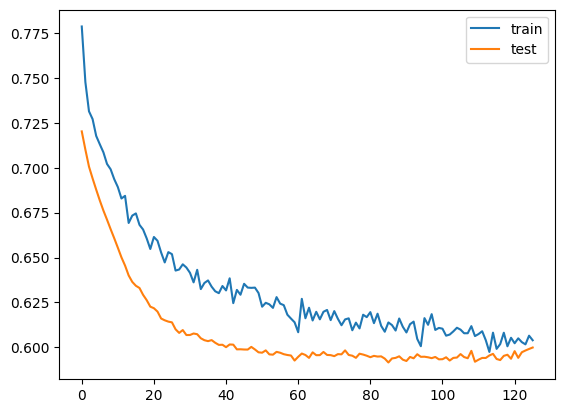

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot


#fit model
model = model_by_Eliane()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=40,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=1000,
    verbose=1,
    callbacks=[early_stopping]
)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [46]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       399
           1       0.65      0.33      0.44       257

    accuracy                           0.67       656
   macro avg       0.66      0.61      0.60       656
weighted avg       0.66      0.67      0.64       656

